In [46]:
import pandas as pd
import matplotlib.pyplot 

In [47]:
cars_df = pd.read_csv('./data/Auto.csv')

In [48]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [49]:
cars_df.shape

(397, 9)

In [50]:
cars_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [51]:
cars_df.origin.unique()

array([1, 3, 2], dtype=int64)

In [52]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [53]:
cars_df[-cars_df.horsepower.str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [54]:
cars_df['horsepower'] = pd.to_numeric(cars_df.horsepower, errors='coarce')


In [55]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


### Overlapped plot

In [56]:
import matplotlib.pyplot as plt
import seaborn as sn

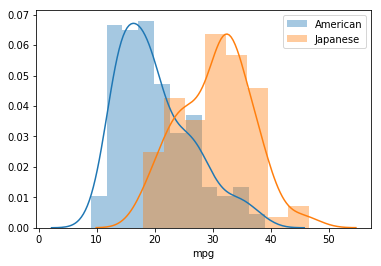

In [57]:
sn.distplot(cars_df[cars_df.origin == 1] ['mpg'], label = 'American')
sn.distplot(cars_df[cars_df.origin == 3] ['mpg'], label = 'Japanese')
#to print labels
plt.legend()

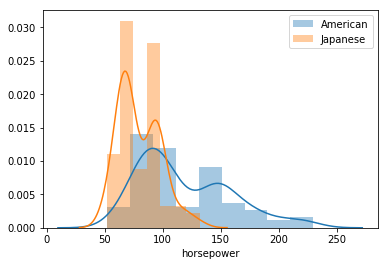

In [59]:
cars_df = cars_df.dropna()
sn.distplot(cars_df[cars_df.origin == 1]['horsepower'], label = 'American')
sn.distplot(cars_df[cars_df.origin == 3]['horsepower'], label = 'Japanese')
#to print labels
plt.legend()


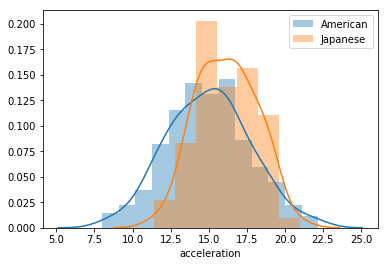

In [61]:

sn.distplot(cars_df[cars_df.origin == 1]['acceleration'], label = 'American')
sn.distplot(cars_df[cars_df.origin == 3]['acceleration'], label = 'Japanese')
#to print labels
plt.legend()

Text(0, 0.5, 'mpg')

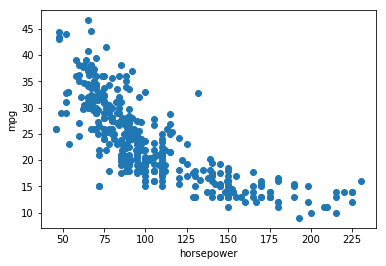

In [62]:
plt.scatter(cars_df.horsepower, cars_df.mpg)
plt.xlabel('horsepower')
plt.ylabel('mpg')


Text(0, 0.5, 'acceleration')

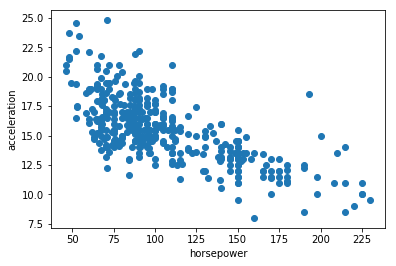

In [66]:
plt.scatter(cars_df.horsepower, cars_df.acceleration)
plt.xlabel('horsepower')
plt.ylabel('acceleration')

Text(0, 0.5, 'displacement')

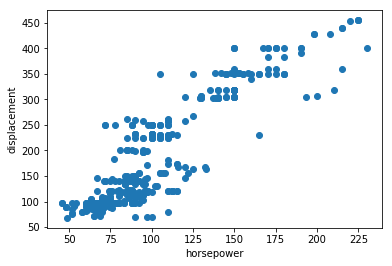

In [67]:
plt.scatter(cars_df.horsepower, cars_df.displacement)
plt.xlabel('horsepower')
plt.ylabel('displacement')

### pair plot

In [71]:
cols =['mpg','horsepower','acceleration','displacement']
cars_df_v1 = cars_df[cols]

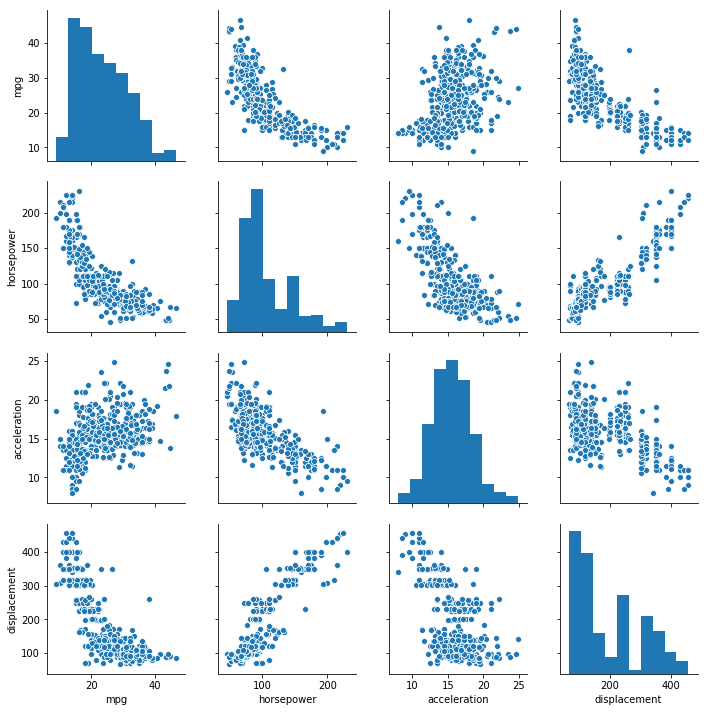

In [72]:
sn.pairplot(cars_df_v1)

### correlation between features

In [76]:
cars_df_v1.corr()

,mpg,horsepower,acceleration,displacement
mpg,1.000000,-0.778427,0.423329,-0.805127
horsepower,-0.778427,1.000000,-0.689196,0.897257
acceleration,0.423329,-0.689196,1.000000,-0.543800
displacement,-0.805127,0.897257,-0.543800,1.000000


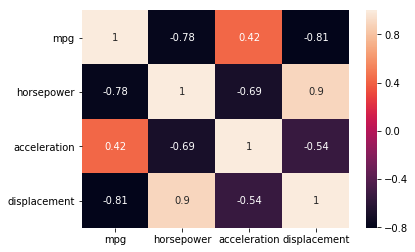

In [80]:
sn.heatmap(cars_df_v1.corr(), annot=True)

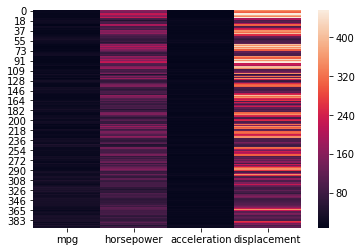

In [77]:
sn.heatmap(cars_df_v1)

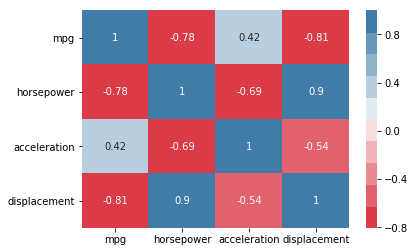

In [81]:
sn.heatmap(cars_df_v1.corr(),
          annot=True,
          cmap=sn.diverging_palette(10, 240, n=10))